## Assignment 5
<br/>
#### Jaime Guevara
#### CS-497

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
# Load data
data = pd.read_csv("bank-additional-full.csv", sep=";")

In [125]:
data[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [126]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [127]:
# Select features and preprocess
y = (data['y'] == "yes") * 1 #Sets y to 1 for yes and 0 for no
data.drop("y", axis=1, inplace=True)

In [128]:
# Import additional necessary components
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [129]:
data[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [130]:
# Encoding features - first I'll encode all columns and test them, then do some feature engineering afterwards
encoded = pd.get_dummies(data)

In [131]:
# drop the duration data as this can only be obtained after a call is made
encoded.drop("duration", axis=1, inplace=True)
encoded[:5]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [132]:
labels = encoded.columns

In [133]:
encoded.dtypes

age                        int64
campaign                   int64
pdays                      int64
previous                   int64
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
job_admin.                 uint8
job_blue-collar            uint8
job_entrepreneur           uint8
job_housemaid              uint8
job_management             uint8
job_retired                uint8
job_self-employed          uint8
job_services               uint8
job_student                uint8
job_technician             uint8
job_unemployed             uint8
job_unknown                uint8
marital_divorced           uint8
marital_married            uint8
marital_single             uint8
marital_unknown            uint8
education_basic.4y         uint8
education_basic.6y         uint8
education_basic.9y         uint8
education_high.school      uint8
education_illiterate       uint8
          

In [134]:
y = y.values
encoded = encoded.values

In [135]:
# Getting our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded, y)

In [136]:
# Build models by adding layers and nodes - using binary_crossentropy for loss and Adam for optimization
model = Sequential()
model.add(Dense(100, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs = 10, batch_size = 128, validation_data=[X_test, y_test])

Train on 30891 samples, validate on 10297 samples
Epoch 1/10
30891/30891 [==============================] - 8s 244us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 2/10
30891/30891 [==============================] - 3s 81us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 3/10
30891/30891 [==============================] - 2s 81us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 4/10
30891/30891 [==============================] - 3s 82us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 5/10
30891/30891 [==============================] - 3s 84us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 6/10
30891/30891 [==============================] - 3s 81us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 7/10
30891/30891 [==============================] - 2s 77us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_ac

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


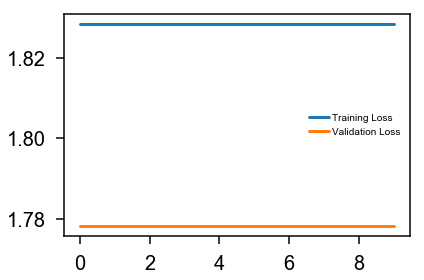

In [137]:
# Plot learning curve of the model over time
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [138]:
#To calculate AUC ROC score
auc = roc_auc_score(y_test, model.predict(X_test))

In [139]:
auc

0.5

In [140]:
#To do L2 regularization
from keras import regularizers
#model.add(Dense(64, input_dim=64,
#kernel_regularizer=regularizers.l2(0.01)))

In [141]:
# Same model but with regularizer
model = Sequential()
model.add(Dense(100,
                activation = "relu",
                kernel_regularizer=regularizers.l2(0.01),
                input_dim = X_train.shape[1]))
model.add(Dense(100,
                kernel_regularizer=regularizers.l2(0.01),
                activation = "relu"))
model.add(Dense(100,
                kernel_regularizer=regularizers.l2(0.01),
                activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs = 10, batch_size = 128, validation_data=[X_test, y_test])

Train on 30891 samples, validate on 10297 samples
Epoch 1/10
30891/30891 [==============================] - 8s 258us/step - loss: 14.7785 - acc: 0.1329 - val_loss: 14.5805 - val_acc: 0.1103
Epoch 2/10
30891/30891 [==============================] - 3s 90us/step - loss: 14.4504 - acc: 0.1134 - val_loss: 14.4359 - val_acc: 0.1103
Epoch 3/10
30891/30891 [==============================] - 3s 89us/step - loss: 14.3401 - acc: 0.1134 - val_loss: 14.3490 - val_acc: 0.1103
Epoch 4/10
30891/30891 [==============================] - 3s 88us/step - loss: 14.2688 - acc: 0.1134 - val_loss: 14.2913 - val_acc: 0.1103
Epoch 5/10
30891/30891 [==============================] - 3s 87us/step - loss: 14.2214 - acc: 0.1134 - val_loss: 14.2530 - val_acc: 0.1103
Epoch 6/10
30891/30891 [==============================] - 3s 90us/step - loss: 14.1900 - acc: 0.1134 - val_loss: 14.2277 - val_acc: 0.1103
Epoch 7/10
30891/30891 [==============================] - 3s 90us/step - loss: 14.1694 - acc: 0.1134 - val_loss: 14

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


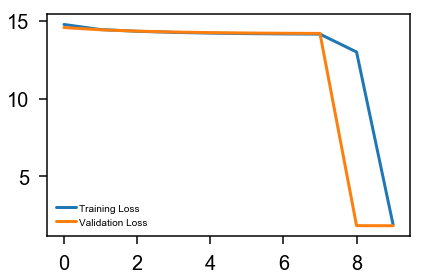

In [143]:
# Plot learning curve of the model over time
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [142]:
#To calculate AUC ROC score
auc = roc_auc_score(y_test, model.predict(X_test))
auc

0.5

In [144]:
# Same model but with regularizer and dropout
model = Sequential()
model.add(Dense(100,
                activation = "relu",
                kernel_regularizer=regularizers.l2(0.01),
                input_dim = X_train.shape[1]))
model.add(Dropout(.4))
model.add(Dense(100,
                kernel_regularizer=regularizers.l2(0.01),
                activation = "relu"))
model.add(Dropout(.4))
model.add(Dense(100,
                kernel_regularizer=regularizers.l2(0.01),
                activation = "relu"))
model.add(Dropout(.4))
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs = 10, batch_size = 128, validation_data=[X_test, y_test])

Train on 30891 samples, validate on 10297 samples
Epoch 1/10
30891/30891 [==============================] - 11s 364us/step - loss: 3.2840 - acc: 0.8749 - val_loss: 2.5814 - val_acc: 0.8897
Epoch 2/10
30891/30891 [==============================] - 4s 145us/step - loss: 2.5657 - acc: 0.8858 - val_loss: 2.4399 - val_acc: 0.8897
Epoch 3/10
30891/30891 [==============================] - 4s 145us/step - loss: 2.4479 - acc: 0.8861 - val_loss: 2.3389 - val_acc: 0.8897
Epoch 4/10
30891/30891 [==============================] - 5s 146us/step - loss: 2.3433 - acc: 0.8866 - val_loss: 2.2494 - val_acc: 0.8897
Epoch 5/10
30891/30891 [==============================] - 4s 146us/step - loss: 2.2585 - acc: 0.8866 - val_loss: 2.1690 - val_acc: 0.8897
Epoch 6/10
30891/30891 [==============================] - 5s 151us/step - loss: 2.1839 - acc: 0.8866 - val_loss: 2.1000 - val_acc: 0.8897
Epoch 7/10
30891/30891 [==============================] - 5s 148us/step - loss: 2.1201 - acc: 0.8866 - val_loss: 2.0412 -

In [145]:
auc = roc_auc_score(y_test, model.predict(X_test))
auc

0.5

In [70]:
y_train[:5]

array([0, 0, 0, 1, 0])

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


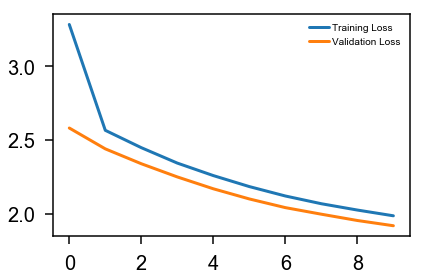

In [146]:
# Plot learning curve of the model over time
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [147]:
# Same model but with only dropout
model = Sequential()
model.add(Dense(100,
                activation = "relu",
                input_dim = X_train.shape[1]))
model.add(Dropout(.4))
model.add(Dense(100,
                activation = "relu"))
model.add(Dropout(.4))
model.add(Dense(100,
                activation = "relu"))
model.add(Dropout(.4))
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs = 10, batch_size = 128, validation_data=[X_test, y_test])

Train on 30891 samples, validate on 10297 samples
Epoch 1/10
30891/30891 [==============================] - 10s 335us/step - loss: 1.9915 - acc: 0.8760 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 2/10
30891/30891 [==============================] - 4s 139us/step - loss: 1.8288 - acc: 0.8865 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 3/10
30891/30891 [==============================] - 4s 145us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 4/10
30891/30891 [==============================] - 4s 139us/step - loss: 1.8284 - acc: 0.8865 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 5/10
30891/30891 [==============================] - 4s 140us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 6/10
30891/30891 [==============================] - 4s 141us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 - val_acc: 0.8897
Epoch 7/10
30891/30891 [==============================] - 4s 144us/step - loss: 1.8283 - acc: 0.8866 - val_loss: 1.7782 -

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


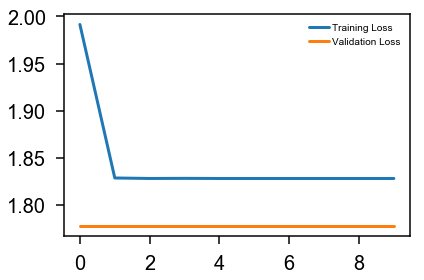

In [148]:
# Plot learning curve of the model over time
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [149]:
auc = roc_auc_score(y_test, model.predict(X_test))
auc

0.5

Question: Why is the AUC still giving me the same 0.5 score? (Maybe I'll remove some features to see if it affects anything, maybe just leaving the dummy columns)

In [155]:
data2 = data
data2[:20]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [157]:
data2 = data2.drop(['default', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

In [171]:
encoded2 = pd.get_dummies(data2)

In [175]:
encoded2 = encoded2.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [176]:
encoded2[:5]

array([[ 5.6000e+01,  1.1000e+00,  9.3994e+01, -3.6400e+01,  4.8570e+00,
         5.1910e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [ 5.7000e+01,  1.1000e+00,  9.3994e+01, -3.6400e+01,  4.8570e+00,
         5.1910e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e

In [173]:
X2_train, X2_test, y2_train, y2_test = train_test_split(encoded2, y)

In [174]:
# Build models by adding layers and nodes - using binary_crossentropy for loss and Adam for optimization
model2 = Sequential()
model2.add(Dense(100, activation = "relu", input_dim = X2_train.shape[1]))
model2.add(Dense(100, activation = "relu"))
model2.add(Dense(100, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model2.fit(x=X2_train, y=y2_train, epochs = 10, batch_size = 128, validation_data=[X2_test, y2_test])

Train on 30891 samples, validate on 10297 samples
Epoch 1/10
30891/30891 [==============================] - 8s 273us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 2/10
30891/30891 [==============================] - 3s 103us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 3/10
30891/30891 [==============================] - 3s 100us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 4/10
30891/30891 [==============================] - 3s 94us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 5/10
30891/30891 [==============================] - 3s 89us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 6/10
30891/30891 [==============================] - 3s 102us/step - loss: 14.1201 - acc: 0.1143 - val_loss: 14.2254 - val_acc: 0.1077
Epoch 7/10
30891/30891 [==============================] - 3s 93us/step - loss: 14.1201 - acc: 0.1143 - val_loss:

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


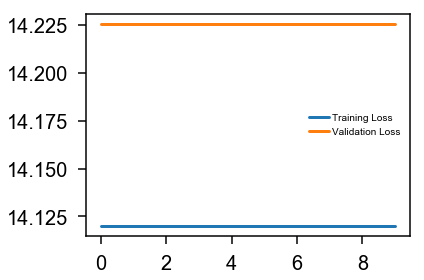

In [177]:
# Plot learning curve of the model over time
plt.plot(model2.history.history["loss"])
plt.plot(model2.history.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [178]:
auc2 = roc_auc_score(y2_test, model.predict(X2_test))
auc2

ValueError: Error when checking input: expected dense_75_input to have shape (62,) but got array with shape (51,)